# Banglore house price pridiction tried to build myself

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

## Load data

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df["society"].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [5]:
df["size"].value_counts

<bound method IndexOpsMixin.value_counts of 0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object>

In [6]:
df = df.drop("society", axis='columns')
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df.shape

(13320, 8)

In [8]:
df = df.drop(["area_type","availability"],axis = "columns")

In [9]:
df.shape

(13320, 6)

# handling missing values

In [10]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
df["balcony"].fillna(int(df["balcony"].mean()), inplace=True)
print(int(df["balcony"].mean()))

1


In [12]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [13]:
df = df.dropna()
df.shape

(13246, 6)

In [14]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

# feature engineering

In [15]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [16]:
df["bhk"] = df["size"].apply(lambda x: int(x.split(" ")[0]) )
df = df.drop("size", axis='columns')
df.head()


,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [17]:
# df.total_sqft = pd.to_numeric(df.total_sqft, errors='ignore')

In [18]:
df.loc[30]

location        Yelahanka
total_sqft    2100 - 2850
bath                  4.0
balcony               0.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [19]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)

In [21]:
df.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [22]:
for i in df.total_sqft:
    if type(i) != float:
        print(type(i))
    else:
        pass
print("all success")
df.head(5)

all success


,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


# Feature Engineering 

### adding new new feature "price per square feet", which will be equal to total_sqft/price

In [23]:
df["price_per_sqft"] = df.price*100000/df.total_sqft


In [24]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [25]:
df_location = df.location.value_counts(ascending=False)
df_location


Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
banashankari stage iii sa               1
Doctor Layout Rayasandra                1
Gayathri Nagar                          1
near Ramanashree California resort      1
Halanayakanahalli                       1
Name: location, Length: 1304, dtype: int64

In [26]:
df_location.values.sum()

13246

In [27]:
df_loc_new = df_location[df_location>10]
len(df_loc_new)

241

In [28]:
len(df_location)


1304

In [29]:
df_loc_other = df_location[df_location<=10]
df_loc_other

Nagappa Reddy Layout                  10
Sadashiva Nagar                       10
Basapura                              10
Kalkere                               10
Nagadevanahalli                       10
                                      ..
banashankari stage iii sa              1
Doctor Layout Rayasandra               1
Gayathri Nagar                         1
near Ramanashree California resort     1
Halanayakanahalli                      1
Name: location, Length: 1063, dtype: int64

# Dimentionality Reduction 

In [30]:
location_less_than_10 = df_location[df_location<=10]
location_less_than_10

Nagappa Reddy Layout                  10
Sadashiva Nagar                       10
Basapura                              10
Kalkere                               10
Nagadevanahalli                       10
                                      ..
banashankari stage iii sa              1
Doctor Layout Rayasandra               1
Gayathri Nagar                         1
near Ramanashree California resort     1
Halanayakanahalli                      1
Name: location, Length: 1063, dtype: int64

In [31]:
df.location =  df.location.apply(lambda x: "other" if x in location_less_than_10 else x)
df.location.value_counts()


other               2896
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
                    ... 
Thyagaraja Nagar      11
Tindlu                11
HAL 2nd Stage         11
Narayanapura          11
Nehru Nagar           11
Name: location, Length: 242, dtype: int64

In [32]:
len(df.location.unique())

242

In [33]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [34]:
# df2 = df[~(df.total_sqft/df.bhk<300)]

In [35]:
# df2.price_per_sqft.describe()

### Outlier Removal using Standard deviation and mean

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for location,subdf in df.groupby("location"):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft >(mean-std)) & (subdf.price_per_sqft < (mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(11434, 7)

In [37]:
df.price_per_sqft.describe()

count    11434.000000
mean      6306.829436
std       3641.845419
min        267.829813
25%       4285.714286
50%       5311.170467
75%       6850.736417
max      53150.000000
Name: price_per_sqft, dtype: float64

### Now lets check for a given location how 2bhk and 3 bhk price look like

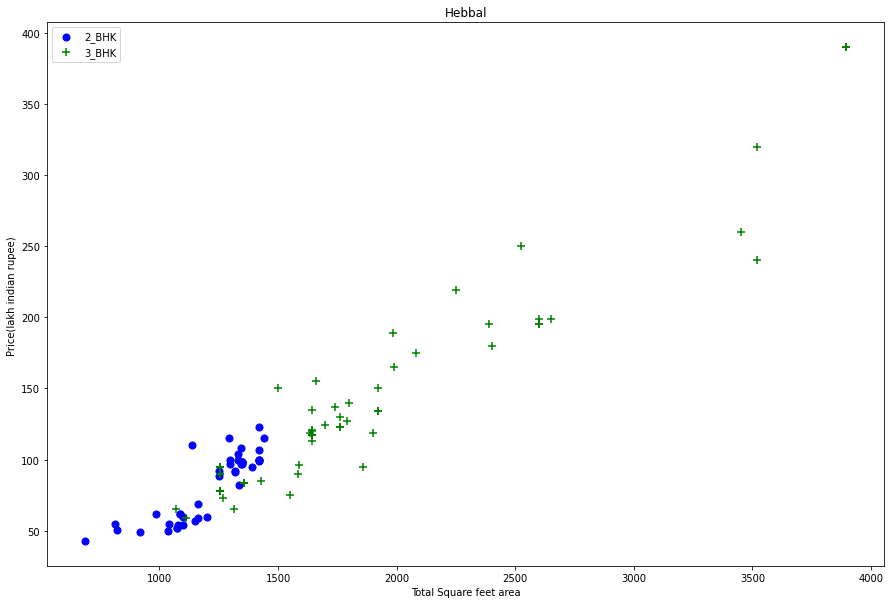

In [38]:
def plot_scatter_chart(df,locat):
    df_2bhk = df[(df.location==locat) & (df.bhk==2)]
    df_3bhk = df[(df.location==locat) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(df_2bhk.total_sqft,df_2bhk.price,color='blue',label='2_BHK',s=50)
    plt.scatter(df_3bhk.total_sqft,df_3bhk.price,marker="+", color='green',label='3_BHK',s=50)
    plt.xlabel("Total Square feet area")
    plt.ylabel("Price(lakh indian rupee) ")
    plt.title(locat)
    plt.legend()
    
plot_scatter_chart(df,"Hebbal")

In [39]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis="index")

df1 = remove_bhk_outlier(df)
df1.shape

(8024, 7)

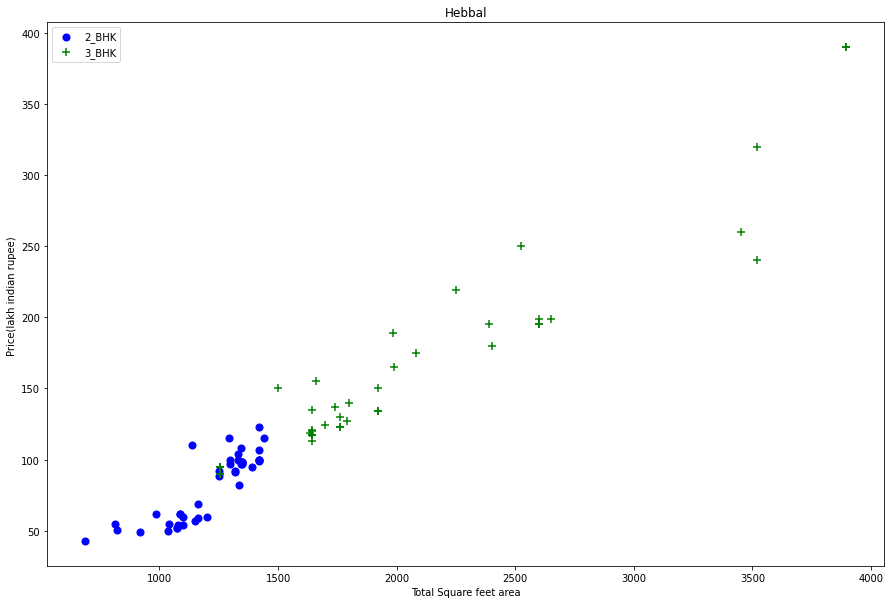

In [40]:
plot_scatter_chart(df1,"Hebbal")

# before outlier removal  and after outlier removal

Text(0, 0.5, 'count')

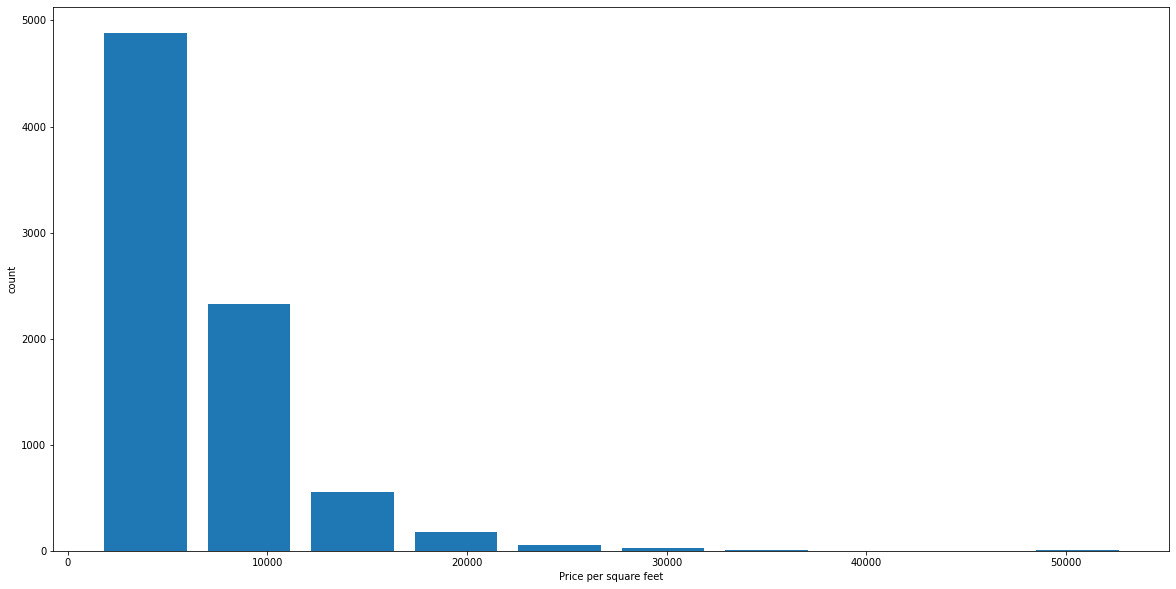

In [41]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df1.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel('count')

In [42]:
df = df1.drop("price_per_sqft",axis='columns')

In [43]:
df.head()

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2


# using one hot encoding for location

In [44]:
dummies = pd.get_dummies(df.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_f = pd.concat([df,dummies.drop('other',axis='columns')],axis="columns")
df_f = df_f.drop('location',axis='columns')

In [46]:
df_f.shape

(8024, 246)

In [47]:
df_f.head(10)

,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1130.0,2.0,2.0,36.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1417.0,2.0,2.0,76.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1230.0,2.0,1.0,58.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1705.0,3.0,2.0,75.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1116.0,2.0,1.0,47.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Now lets Build a model


In [48]:
X = df_f.drop(["price", "balcony"],axis="columns")

Y = df_f.price

In [49]:
print(f"Y: {Y.shape}")
print(f"X: {X.shape}")

Y: (8024,)
X: (8024, 244)


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
print(f"X_train: {X_train.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"Y_test: {Y_test.shape}")

X_train: (6419, 244)
Y_train: (6419,)
X_test: (1605, 244)
Y_test: (1605,)


In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.68901658236629